# Model Training

### Import Necessary Libraries

In [165]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

warnings.filterwarnings("ignore")

%matplotlib inline

### Load The Features Selection Data

In [166]:
df = pd.read_csv('../data/notebookData/final_features_selection_data.csv')
df.head().T

,0,1,2,3,4
study_hours_per_day,0.0,6.9,1.4,1.0,5.0
social_media_hours,1.2,2.8,3.1,3.9,4.4
netflix_hours,1.1,2.3,1.3,1.0,0.5
attendance_percentage,85.0,97.3,94.8,71.0,90.9
sleep_hours,8.0,4.6,8.0,9.2,4.9
exercise_frequency,6.0,6.0,1.0,4.0,3.0
mental_health_rating,8.0,8.0,1.0,1.0,1.0
exam_score,56.2,100.0,34.3,26.8,66.4


In [167]:
df.shape

(1000, 8)

In [168]:
df.columns

Index(['study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
study_hours_per_day,1000.0,3.5501,1.468890,0.0,2.600,3.5,4.500,8.3
social_media_hours,1000.0,2.5055,1.172422,0.0,1.700,2.5,3.300,7.2
netflix_hours,1000.0,1.8197,1.075118,0.0,1.000,1.8,2.525,5.4
attendance_percentage,1000.0,84.1317,9.399246,56.0,78.000,84.4,91.025,100.0
sleep_hours,1000.0,6.4701,1.226377,3.2,5.600,6.5,7.300,10.0
exercise_frequency,1000.0,3.0420,2.025423,0.0,1.000,3.0,5.000,6.0
mental_health_rating,1000.0,5.4380,2.847501,1.0,3.000,5.0,8.000,10.0
exam_score,1000.0,69.6015,16.888564,18.4,58.475,70.5,81.325,100.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   study_hours_per_day    1000 non-null   float64
 1   social_media_hours     1000 non-null   float64
 2   netflix_hours          1000 non-null   float64
 3   attendance_percentage  1000 non-null   float64
 4   sleep_hours            1000 non-null   float64
 5   exercise_frequency     1000 non-null   int64  
 6   mental_health_rating   1000 non-null   int64  
 7   exam_score             1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


### Separate Features (X) and Target (y)

We never test a model on the same data it studied. We split the data into a **Training Set** (to learn patterns) and a **Testing Set** (to see if it can predict scores for "new" students).

In [171]:
X = df.drop(columns=['exam_score'])
y = df['exam_score']

X.shape, y.shape

((1000, 7), (1000,))

### Split The Data

In [172]:
# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (800, 7)
Testing set size: (200, 7)


In [173]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 7), (200, 7), (800,), (200,))

### Scale the features

In [174]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Use the original X_train for 'BEFORE' and your new X_train_df for 'AFTER'
print("--- BEFORE SCALING (Original) ---")
display(X_train.describe().T)

print("\n--- AFTER SCALING (Standardized) ---")
display(X_train_df.describe().T)

X_train_df.shape, X_test_df.shape, y_train.shape, y_test.shape

--- BEFORE SCALING (Original) ---


,count,mean,std,min,25%,50%,75%,max
study_hours_per_day,800.0,3.557875,1.484922,0.0,2.5,3.50,4.5,8.3
social_media_hours,800.0,2.485000,1.167885,0.0,1.7,2.50,3.3,7.2
netflix_hours,800.0,1.820750,1.092376,0.0,1.0,1.80,2.6,5.4
attendance_percentage,800.0,84.256375,9.414969,56.0,78.4,84.55,91.1,100.0
sleep_hours,800.0,6.464875,1.226013,3.2,5.6,6.40,7.3,10.0
exercise_frequency,800.0,3.068750,2.014099,0.0,1.0,3.00,5.0,6.0
mental_health_rating,800.0,5.462500,2.851097,1.0,3.0,5.00,8.0,10.0



--- AFTER SCALING (Standardized) ---


,count,mean,std,min,25%,50%,75%,max
study_hours_per_day,800.0,-8.437695e-17,1.000626,-2.397500,-0.712857,-0.038999,0.634858,3.195515
social_media_hours,800.0,9.992007e-17,1.000626,-2.129109,-0.672576,0.012852,0.698279,4.039739
netflix_hours,800.0,1.243450e-16,1.000626,-1.667822,-0.751814,-0.019007,0.713799,3.278622
attendance_percentage,800.0,-6.084022e-16,1.000626,-3.003096,-0.622417,0.031207,0.727342,1.673237
sleep_hours,800.0,5.684342e-16,1.000626,-2.664668,-0.705878,-0.052949,0.681598,2.885236
exercise_frequency,800.0,-4.440892e-17,1.000626,-1.524587,-1.027777,-0.034156,0.959465,1.456276
mental_health_rating,800.0,-1.221245e-16,1.000626,-1.566166,-0.864243,-0.162320,0.890565,1.592488


((800, 7), (200, 7), (800,), (200,))

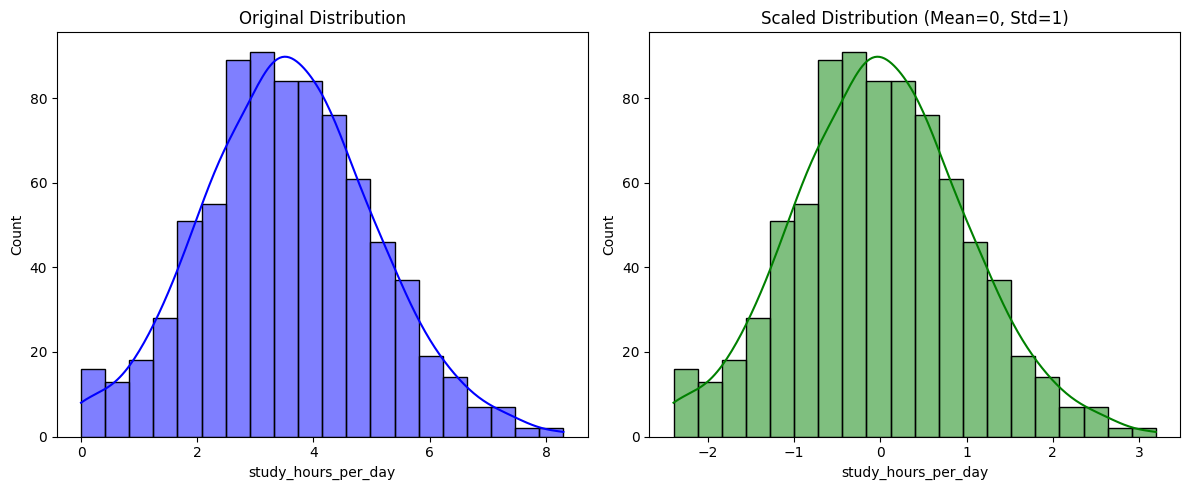

In [175]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before Scaling (Original DataFrame)
sns.histplot(X_train['study_hours_per_day'], ax=ax1, kde=True, color='blue')
ax1.set_title("Original Distribution")

# After Scaling (Use the DataFrame we created earlier)
# We use X_train_df because it has the column names!
sns.histplot(X_train_df['study_hours_per_day'], ax=ax2, kde=True, color='green')
ax2.set_title("Scaled Distribution (Mean=0, Std=1)")

plt.tight_layout()
plt.show()

### Train The Model

Since we are predicting a continuous number (a score from 0 to 100), this is a **Regression** problem. We will start with a **Linear Regression** model because it is highly interpretable and works very well when you have such a strong correlation (0.83) in your data.

Now we let the AI look at the X_train (habits) and y_train (actual scores) to find the mathematical relationship.

### Evaluate The Performance

Now we ask the model to predict the scores for the 200 students in the test set it has never seen before. We will use two key metrics:

-   **MAE (Mean Absolute Error)**: On average, how many points is the model off by? (Lower is better).

-   **R² (R-Squared)**: How much of the "variance" in scores can the model explain? (1.00 is a perfect score).

In [176]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "xgiboost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
}

print(f"{'Model':<15} | {'R² Score':<10} | {'Model Accuracy':<15} | {'MAE':<10} | {'RMSE':<10}")
print("-" * 66)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test_scaled, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name:<15} | {r2:<10.3f} | {accuracy:<15.3f} | {mae:<10.2f} | {rmse:<10.2f}")

Model           | R² Score   | Model Accuracy  | MAE        | RMSE      
------------------------------------------------------------------
Linear          | 0.900      | 0.900           | 4.11       | 5.07      
Ridge           | 0.900      | 0.900           | 4.12       | 5.08      
Lasso           | 0.899      | 0.899           | 4.14       | 5.10      
Random Forest   | 0.812      | 0.812           | 5.62       | 6.95      
xgiboost        | 0.872      | 0.872           | 4.69       | 5.73      


Here we can see the Linear Model performs Best so we will work with it

### Save The Final Lr Model

In [177]:
# Save the best model (Linear)
joblib.dump(models['Linear'], '../data/student_score_model.pkl')

# Save the scaler (Crucial!)
joblib.dump(scaler, '../data/scaler.pkl')

print("Champion model and scaler saved successfully! 🏆")

Champion model and scaler saved successfully! 🏆


### This is for ```src/step/e_model_traing.py```

In [ ]:
def model_training():
    """Train multiple regression models and evaluate their performance."""
    
    # separate the features and target variable
    X = df.drop(columns=['exam_score'])
    y = df['exam_score']

    # Split: 80% for training, 20% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # define models to train
    models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "xgiboost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    }

    print(f"{'Model':<15} | {'R² Score':<10} | {'Model Accuracy':<15} | {'MAE':<10} | {'RMSE':<10}")
    print("-" * 66)

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        r2 = r2_score(y_test, y_pred)
        accuracy = model.score(X_test_scaled, y_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"{name:<15} | {r2:<10.3f} | {accuracy:<15.3f} | {mae:<10.2f} | {rmse:<10.2f}")

    
    # save the best model (Linear)
    joblib.dump(models['Linear'], '../data/student_score_model.pkl')
    # save the scaler (Crucial!)
    joblib.dump(scaler, '../data/scaler.pkl')

    return r2, accuracy